# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [105]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [106]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4420,5139,2661,8872,1321,181
1,6373,780,950,878,288,285
2,117,6264,21203,228,8682,1111


Plot of percentile rank of chosen samples


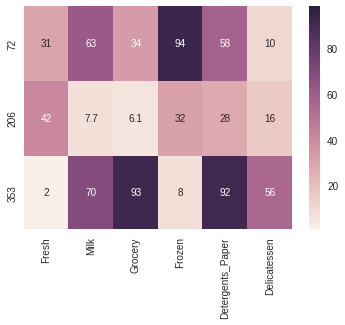

In [107]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [72,206,353]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)


print "Plot of percentile rank of chosen samples"
import seaborn as sns
# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)
# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)
# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]
# Now, create the heat map using the seaborn library
_ = sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** 
Customer 72 is in the top 94th percentile for Frozen purchases, the 63rd percentile for Milk, the 58th percentile for Detergents_paper purchases, the 34th percentile for Grocery, the 31st percentile for Fresh and the 10th percentile for Delicatessen. Given that the size of the operation is quite small, I would venture that this might be a corner store with a few fresh items and lots of frozen pre-made food for sale. If the Frozen purchases are for frozen produce, however, this could be a smoothie shop.

Customer 206 spends the least amount of money out of the 3 samples, indicating that they are likely a small operation. They are in the 42nd percentile for Fresh, the 32nd percentile for Frozen, the 28th percentile for Detergents_paper, the 16th percentile for Delicatessen purchases and in the bottom 10 percent for everything else. Given this information, my best guess is that this might be a small cafe that serves salads and smoothies.

Customer 353 purchases much more than customers 72 and 206. Their spending is in the 93rd percentile for Grocery, the 92nd percentile for Detergents_Paper, the 70th percentile for Milk, the 56th percentile for Delicatessen and near the minimum for Fresh and Frozen. This would indicate that they don't sell much produce and that their refrigeration is limited. I would guess that this is from a retail pharmacy store, given that most retail pharmacy stores sell milk, some deli, non perishable foods (groceries) and cleaning supplies / detergent. It might also be a gas station store.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [108]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
print samples.columns.values
feature_name = 'Delicatessen'
new_data = data.drop([feature_name],axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature_name], test_size=0.25, random_state=2061)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 1472)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print score

['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
-0.511505805215


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I tried to predict 'Delicatessen'. The reported prediction score was -0.5115. This feature is necessary for identifying customers' spending habits. I conclude this because "a negative R^2 implies that the model fails to fit the data". This means that because I cannot accurately predict the spending on Delicatessen from the spendings in the other categories, that it is a necessary feature and should be included as a feature in any machine learning model that we use. 

Out of curiosity, I tried doing the same procedure for all of the other features. The only features that seemed to have larger positive R^2 scores with some sort of consistency were 'Grocery' (R^2 = 0.592) and Detergents_paper (R^2 = 0.6386). The others all had negative or near-zero R^2 scores. So it is possible that Grocery or Detergents_paper could be removed if (somehow!) you didn't have enough computational resources to handle these features. However, since the R^2 values are significantly below 1, I would advocate that all of the features be included in the model.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


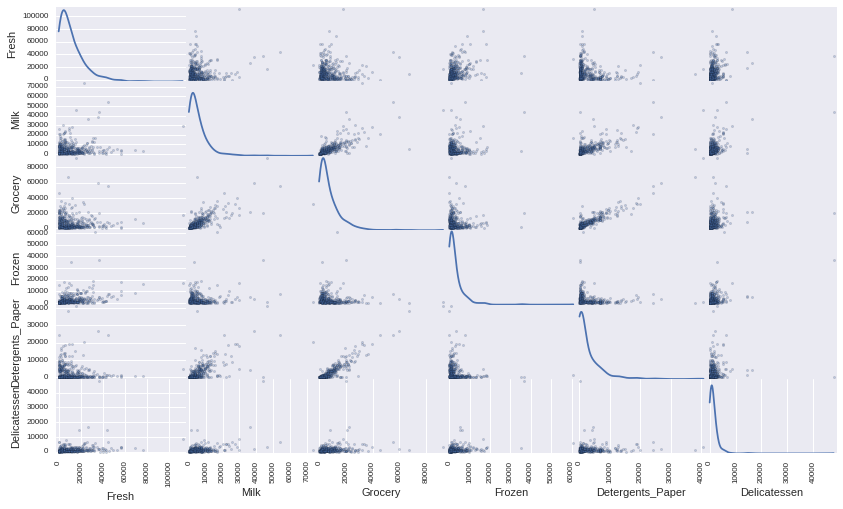

In [109]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
data.corr()

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** Yes, the two features that show the strongest correlation (pairwise correlation = 0.925) are Grocery and Detergents_paper.  Additional strong correlations exist between Grocery and Milk (pairwise correlation = 0.728) and Milk and Detergents_paper (pairwise correlation = 0.662). Weak correlations exist between Delicatessen and Milk (pairwise correlation = 0.4), Delicatessen and Frozen (pairwise correlation = 0.391), and between Fresh and Frozen (pairwise correlation = 0.346).

Given what I found in the previous study, and looking at the plots and correlation table for Delicatessen, there are only weak correlations that I see between Delicatessen and any other feature. This confirms to me that Delicatessen is an important feature that should be included in the model. The data for Delicatessen is not normally distributed, but strongly positively skewed, as are all the other categories. 99 percent of the spending values on Delicatessen are less than 10000 whereas the range goes up to 50000. However for Grocery and Detergents_paper, although most of the spending is less than 10000 for Detergents_paper and less than 20000 for Grocery, there are far fewer outliers. When spending is large on Detergents_paper, it is also large for Grocery.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

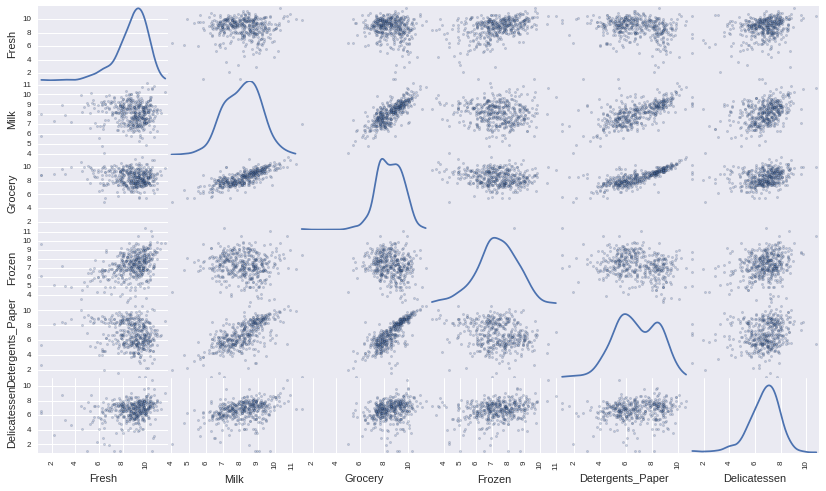

In [110]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [111]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.393895,8.544614,7.886457,9.090656,7.186144,5.198497
1,8.759826,6.659294,6.856462,6.777647,5.662960,5.652489
2,4.762174,8.742574,9.961898,5.429346,9.069007,7.013016


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [112]:
from collections import Counter

outlier_counter = Counter()

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25.0)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75.0)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    indices = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    for index in indices:
        outlier_counter[index] += 1

outliers =  []

# OPTIONAL: Select the indices for data points you wish to remove
for key in outlier_counter:
    if outlier_counter[key] > 1:
        outliers.append(key)

print outliers
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[128, 154, 65, 66, 75]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Yes, there are 5 data points which are considered outliers for more than one feature: 65, 66,75,128, and 154. I chose to remove these points from the data set, since they are outliers in multiple features. I originally considered removing all points which were defined to be outliers for one feature, but that would have represented nearly 10 percent of the data, and I considered it excessive to throw away that much information. Hopefully, with these 5 outliers removed, we can gain better insights into our data and get more clear observations about the structure of the data.

However, I would add that for this particular case, we need to be very careful about throwing away outliers. Many of the outliers will be the biggest customers for the business because they purchase much more than the average customer. By throwing away their data in creating the model, one may uncover information that is true for the smaller customers, leading to decisions that benefit these smaller customers. Unfortunately, these decisions which serve to benefit smaller, may make larger customers unhappy, resulting in a disproportionate impact on the profitability of the business.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

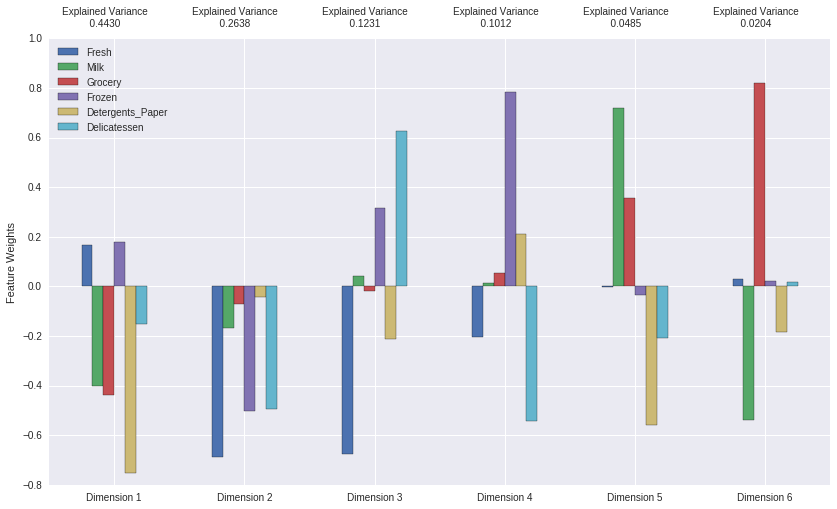

In [113]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** 70.68 percent of the variance is explained in total by the first and second principal components. 93.11 percent of the variance is explained in total by the first four principal components. 

The first dimension is strongly correlated with Detergents_paper and less significantly correlated with Groceries and Milk. For all of these features, the correlation coefficients are negative, meaning that the coefficient corresponding to the first dimension increases strongly with decreasing Detergents_paper and increasely weakly with decreasing Groceries and decreasing Milk. A customer with a large negative value for the first dimension would more likely be indicative of a retailer, as a retailer would sell Detergents_paper, Grocery, and Milk.

The second dimension is strongly correlated with Fresh, Frozen and Delicatessen. Similar to the first dimension, all of the correlation coefficients are negative meaning that the coefficient corresponding to the second dimension increases strongly with decreasing Fresh, Frozen and Delicatessen. Customers with large negative coefficients for the second dimension would be indicative of businesses which serve food to customers and purchase more from the Fresh, Frozen and Delicatessen categories.

The third dimension is strongly correlated with Delicatessen and Fresh and weakly correlated with Frozen. However, the signs of the coefficients are different, with the coefficient for Fresh being negative and the coefficients for Delicatessen and Frozen being positive. A customer with a large negative coefficient for the third dimension would be indicative of a customer which serves a lot of fresh food, but not much Delicatessen and Frozen, maybe a smoothie restaurant or salad bar. A customer with a large positive coefficient for the third dimension would be indicative of a customer which purchases a lot of Delicatessen and some frozen, but not much Fresh, maybe a sandwich shop?

The fourth dimension is strongly correlated with Frozen and Delicatessen. Again the signs of the coefficients are opposite in sign, with the coefficient for Frozen being positive and the coefficient for Delicatessen being negative. A customer with a large positive coefficient for the fourth dimension might indicate a retail customer that sells a lot of frozen food, while a customer with a large negative coefficient might again indicate a sandwich shop.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [114]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.2699,0.0654,-0.1853,2.3291,0.1348,-0.7704
1,2.2036,1.2006,-0.6098,-0.2094,-0.7564,-0.3472
2,-3.6663,3.2327,1.8306,-0.2761,-0.2851,0.3370


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [115]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [116]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.2699,0.0654
1,2.2036,1.2006
2,-3.6663,3.2327


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
The main advantages of using a K-Means clustering algorithm are that it is computationally efficient and that it is simple to implement and understand. However, it has a number of disadvantages. It can find suboptimal local minima, it is strongly sensitive to noise and outliers, it doesn't work well with non-spheroid cluster shapes or clusters of different sizes and densities. It also doesn't do well with nonlinear data, and due to the hard clustering, can produce tighter clusters than what would be desired.

The main advantages of using a Gaussian Mixture Model clustering algorithm is that it produces a monotonically non-decreasing likelihood, usually converges when put in practice (won't diverge), and works with any distribution if it is Expectation Maximization solvable. It can create non-spherical clusters and as such, is more suitable for capturing nonlinear clusters. The main disadvantages are that it is computationally more expensive that K-means and it can get stuck (but this can be mitigated by random restarting).

Both approaches suffer from the need to specify k, the number of clusters, as this is usually not known a-priori.

Based on my observations of the wholesale customer data so far, I would choose the Gaussian Mixture Model. This is due to the fact that the wholesale customer data seems strongly nonlinear and I have doubts that spherical clusters with a hard clustering approach would be able the complexity of the underlying data.


References (in addition to lecture notes):

1. http://stats.stackexchange.com/questions/58855/why-do-we-use-k-means-instead-of-other-algorithms
2. https://sites.google.com/site/dataclusteringalgorithms/k-means-clustering-algorithm



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
 - Assign the silhouette score to `score` and print the result.

In [117]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

max_score = 0
max_n_clusters = 2

# TODO: Apply your clustering algorithm of choice to the reduced data 
for nClusters in range(2,11):
    clusterer = GaussianMixture(nClusters,random_state=1461)
    clusterer.fit(reduced_data)
# TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    if score > max_score:
        max_n_clusters = nClusters
        max_score = score
    
    print score

clusterer = GaussianMixture(max_n_clusters,random_state=1461)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
# TODO: Find the cluster centers
centers = clusterer.means_
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

0.421916846463
0.42147965857
0.321525412612
0.288865915253
0.326139450471
0.337272493028
0.306367091169
0.333744709107
0.321525479637


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** I computed the silhouette score for 2-10 clusters. The scores are shown below:


| n_clusters | silhouette score |
|:------:|:------:|
|   2  | 0.422|
|   3  | 0.421|
|   4  | 0.322|
|   5  | 0.289|
|   6  | 0.326|
|   7  | 0.337|
|   8  | 0.306|
|   9  | 0.334|
|   10 | 0.322|


From the resulting silhouette scores, it seems that the optimal number of clusters is 2, although 3 might work similarly.


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

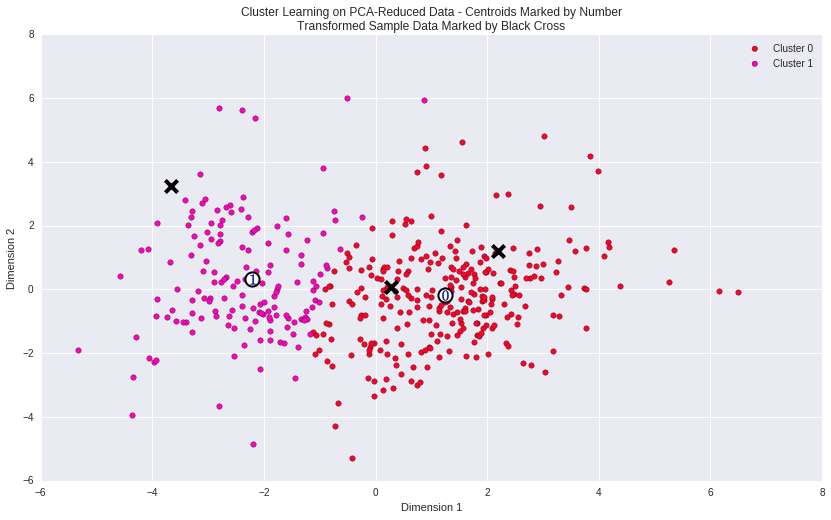

In [118]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


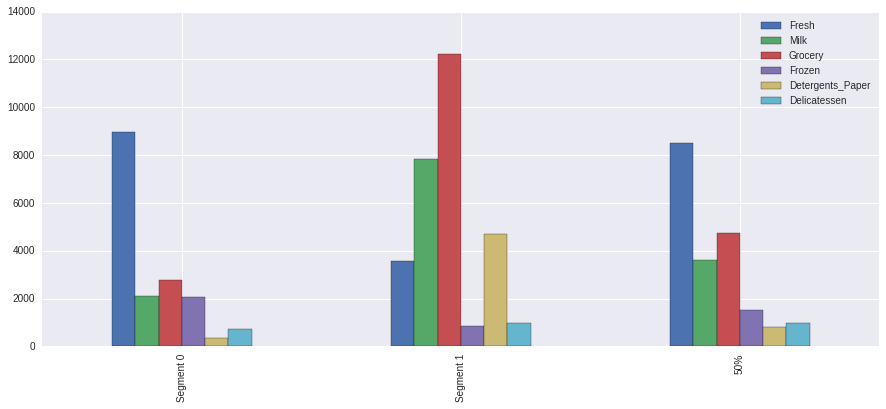

In [119]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

import seaborn as sns
true_centers = true_centers.append(data.describe().loc['50%'])
_ = true_centers.plot(kind='bar', figsize=(15,6))

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** A customer who is assigned to 'Cluster 0' should best identify with businesses which prepare food for sale to customers. I would make this assertion because the true center of Cluster 0 represents customers who purchase more than the median amount of Fresh and Frozen, but a less than the median amount of items from Milk, Grocery, Detergents_paper and Delicatessen categories. This is consistent with the purchases I would expect from a restaurant or cafe.

A customer who is assigned to 'Cluster 1' should best identify with customers in the retail business. I come to this conclusion because the true center of Cluster 1 represents customers who purchase more than the median amount of Milk and Grocery significantly more than the median amount of Detergents_paper products, with slightly smaller than the median purchases in all other categories. This is consistent with purchases I would expect from a grocery store or drugstore.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [120]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred


Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:** For the customer segments from Question 8, and considering my original analysis of the sample points, I would classify sample points 0 and 2 to be in Cluster 1 (retail) with sample point 1 to be in Cluster 0 (cafes and restaurants). For two out of the three sample points, the predictions agree with my labeling. Sample Point 0 is predicted by the algorithm to be in Cluster 1 instead of Cluster 0. When taking a look at the data again, I think it is because cluster 0 seems to represent customers with larger purchases of "Frozen" food than cluster 1.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** 

The wholesale distributor could use the customer segments to determine whether or not each of the two categories of customers would react positively to the change in delivery service by considering the needs of the two groups. Hypothetically, customers who don't purchase much from the "Fresh" (corresponding to Cluster 1) category can probably afford to have fewer deliveries per week because they will carry fewer perishable items. However, customers in Cluster 0 which purchase a lot of Fresh may want deliveries 5 days a week to have fresher food available to serve to customers.

Thus, one would need to design two separate A/B tests. The first would only use customers in Cluster 0 whereas the second would only use customers in Cluster 1. For each test, the distributor would seperate the customers into an experimental group and a control group. The experimental group would get deliveries 3 days a week, while the control group would maintain the existing 5 days a week delivery service. Based on the feedback and response from the experimental group, one could then draw some conclusions regarding how this particular set of customers would respond to this change. By doing this, the company could assess the impact of changing the delivery schedule on the different types of customers.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** The wholesale distributor could take the set of existing customers with their customer segment predicted by the clustering algorithm and train a supervised learning algorithm. The target variable in this case would be the cluster number (0 or 1). The features would be the 6 categories of spending in the customer segment data. One could use a random forest or boosting algorithm with a decision tree base classifier to make the prediction. Alternatively, one could use a support vector machine classifier.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

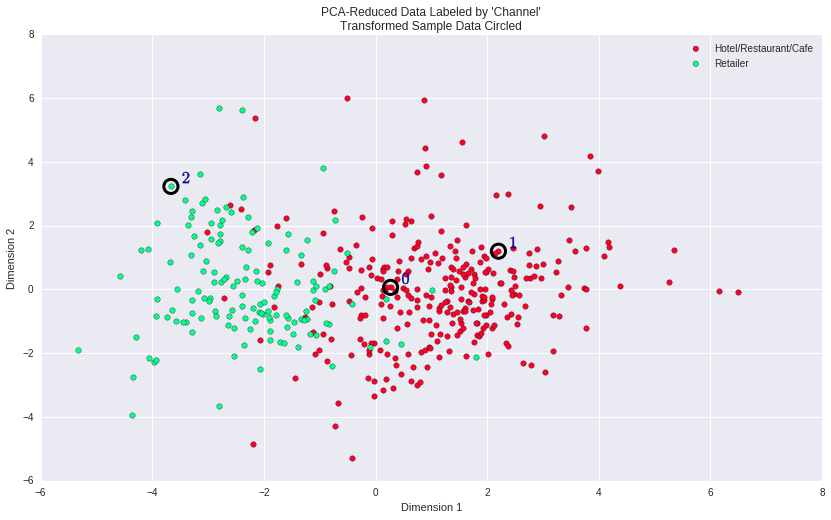

In [121]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The clustering algorithm that I chose (Gaussian Mixture) is a soft clustering algorithm and one can see that given the overlap of the two clusters, that this was an appropriate algorithm to choose. It is also apparent from this plot that the choice of using two clusters was a good choice, as there seem to be two main categories of customers. Given the segments that were identified, I would classify Segment 1 as Retailers and Segment 0 as Hotels/Restaurants/Cafes , given this distribution. However, I would note that there is a significant amount of overlap, and as such, these classifications should not be strictly adhered to. One could consider strict classification along Dimension 1 to be 'Retailer' if Dimension 0 < -3.5 and 'Hotels/Restaurants/Cafes' if Dimension 1 < 2, but there is a significant amount of overlap / interpenetration in the middle. I would say that these classifications are consistent with my previous definition of the customer segments, given the similar centroid, size, shape and overlap of the clusters that I found.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.